<h1><center>Customer Churn</center></h1>
<h2><center>Exploratory Data Analysis</center></h2>

<h2> Please Upvote if you liked my work here.

You can also : 
* Check the **GitHub Project Repository**

[![](https://img.shields.io/badge/Customer%20Churn%20EDA-GitHub-100000?logo=github&logoColor=white)](https://github.com/omar-mostafa-taha/Customer_Churn)

* View the **Streamlit App** of this Project **Live** 

[![Live in Streamlit](https://static.streamlit.io/badges/streamlit_badge_black_white.svg)](https://customer-churn-eda.streamlit.app/)

# Table of Contents
* [Data Description](#1)
* [Importing Libraries](#2)
* [Data Overview](#3)
* [Data Cleaning](#4)
* [Exploratory Data Analysis](#5)
    * [Creating Additional Columns](#5.1)
    * [Univariate Analysis](#5.2)
        * [Demographic info about customers](#5.2.1)
        * [Customer account information](#5.2.2)
        * [Services that each customer has signed up for](#5.2.3)
        * [Target Feature (Churn)](#5.2.4)
    * [Bivariate Analysis](#5.3)
        * [Demographic info about customers](#5.3.1)
        * [Customer account information ](#5.3.2)
        * [Services that each customer has signed up for](#5.3.3)
            * [Percentages of Customers using each Service](#5.3.3.1)
            * [Services Churn Rates](#5.3.3.2) 
    * [Multivariate Analysis](#5.4)
        * [Demographic info](#5.4.1)
        * [Customer Account info](#5.4.2)
* [Conclusion](#6)    

<a id='1'></a>
# Data Description

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Contains customer ID</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>whether the customer female or male</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Whether the customer is a senior citizen or not (1, 0)</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Whether the customer has a partner or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Whether the customer has dependents or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Number of months the customer has stayed with the company</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Whether the customer has a phone service or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Whether the customer has multiple lines r not (Yes, No, No phone service)</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Customer’s internet service provider (DSL, Fiber optic, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Whether the customer has online security or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Whether the customer has online backup or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Whether the customer has device protection or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Whether the customer has tech support or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Whether the customer has streaming TV or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Whether the customer has streaming movies or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>The contract term of the customer (Month-to-month, One year, Two year)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Whether the customer has paperless billing or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>The amount charged to the customer monthly </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>The total amount charged to the customer </td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Whether the customer churned or not (Yes or No)</td>
<td>categorical</td>
</tr>
</tbody>
</table>

<a id='2'></a>
<h1>Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


**these lines of code are used to enable Plotly in the Jupyter notebook and display Plotly graphs inline.**

In [2]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

<a id='3'></a>
<h1>Data Overview

In [4]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**TotalCharges data type need modification**<br>
**Only tenure , MonthlyCharges and TotalCharges are Numerical Variables**

In [7]:
df[df.TotalCharges==' '].shape

(11, 21)

In [8]:
df.TotalCharges = df.TotalCharges.str.replace(' ','0')
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<a id='4'></a>
<h1>Data Cleaning

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop(columns=['customerID'],inplace=True)

**No missing values.
<br>No wrong data types.<br>No duplicates<br>
The data is ready for exploration.**

<a id='5'></a>
<h1>Exploratory Data Analysis

In [14]:
#This function takes one column and visualize plotly Pie chart
def pie(df,col):
    data=df[col].value_counts()
    fig=px.pie(data,values=data.values,names=data.index,title=f"{col} Pie Plot",width=400);
    fig.show()

In [15]:
#This function takes one column and Hue then visualize seaborn Histogram 
def hist(col,set_hue=None):
    plt.figure(figsize=(8,6))
    sns.histplot(data=df,x=col,kde=True,hue=set_hue,multiple='stack');
    plt.title(f'{col} Distribution')
    plt.show()

In [16]:
#This function takes one column and Hue then visualize seaborn countplot 
def count(col,set_hue=None):
    plt.figure(figsize=(6,6))
    sns.countplot(data=df,x=df[col],hue=set_hue);
    plt.show();

In [17]:
# We could have done this instead of subplots headache
#column1=['gender','SeniorCitizen','Partner','Dependents','Contract','PaperlessBilling','PaymentMethod','Churn']
#column2=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
#for col in columns:
#    count(col);

<a id='5.1'></a>
<h2>Creating Additional Columns 

In [18]:
df.tenure.min(),df.tenure.max()

(0, 72)

In [19]:
df.MonthlyCharges.min(),df.MonthlyCharges.max()

(18.25, 118.75)

In [20]:
df.TotalCharges.min(),df.TotalCharges.max()

(0.0, 8684.8)

In [21]:
df['tenure_group']=pd.cut(df['tenure'],bins=[-1,25,48,73],labels=['Low','Medium','High'])
df['MonthlyCharges_group']=pd.cut(df['MonthlyCharges'],bins=[18,52,85,119],labels=['Low','Medium','High'])
df['TotalCharges_group']=pd.cut(df['TotalCharges'],bins=[0,2895,5790,8685],labels=['Low','Medium','High'])

<a id='5.2'></a>
<h2>Univariate Analysis

<a id='5.2.1'></a>
<h3>1. Demographic info about customers

In [22]:
#This function takes dataframe , 1:4 columns ,hue and palette then visualize seaborn countplots
def count_group(df,cols,set_hue=None,set_palette=None):
    colors=['red','green','blue','yellow']
    fig , ax = plt.subplots(1,len(cols),figsize=(7*len(cols),6))
    for i , col in enumerate(cols):
        sns.countplot(
                      data=df
                      ,x=col
                      ,ax=ax[i]
                      ,color=colors[i]
                      ,hue=set_hue
                      ,palette=set_palette)
        ax[i].set_title(f'{col} Count Plot')

    plt.show()

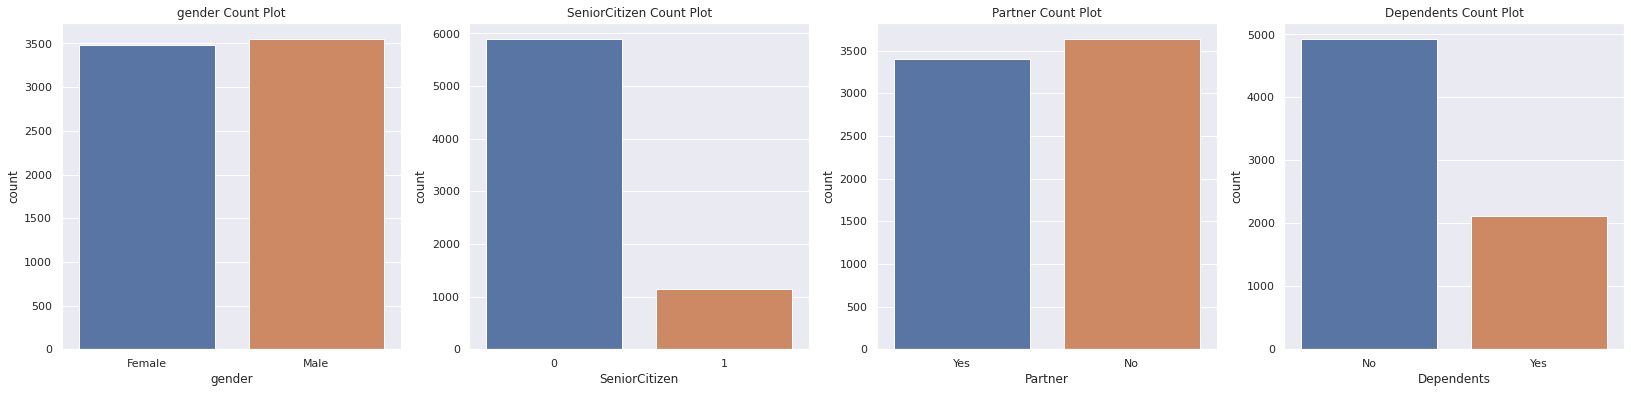

In [23]:
count_group(df,['gender','SeniorCitizen','Partner','Dependents'],set_palette='deep')

In [24]:
# pie_group(df,['SeniorCitizen','Dependents','Partner'],'Demographic info')

**1. About half of the customers in our data set are males while the other half are females.<br>
2. Only 16.2% are Seniors.<br>
3. Only 30% have Dependents.<br>
4. About half of the customers have Partners (48.3%)**

<a id='5.2.2'></a>
<h3>Customer account information 

In [25]:
# This function takes dataframe , three features and a title then plot 3 Plotly Pie plots
def pie_group(df,cols,title=' '):
    fig = make_subplots(
        rows=1
        ,cols=3
        ,subplot_titles=(cols[0],cols[1],cols[2])
        ,specs=[[{'type':'domain'},{'type':'domain'}, {'type':'domain'}]])
    
    for i,col in enumerate(cols):
        fig.add_trace(
            go.Pie(
            labels=df[col].value_counts().index
            ,values=df[col].value_counts().values
            ,textinfo='label+percent'
            ,insidetextorientation='radial'
            )
                      ,row=1
                      ,col=1+i
                     )

    fig.update(layout_showlegend=True)
    fig.update_layout(height=400, width=1200, title_text=title)
    fig.show()

In [26]:
pie_group(df,['Contract','PaperlessBilling','PaymentMethod'],'Customer account information')

**1. about half of the customers contracts are Month to Month (55%).<br>
2. 60% of the customers prefer Paperless Billing.<br>
3. 33.6% of the customers pay using Electronic Check while other methods are nearly equal.**

In [27]:
#This function takes dataframe , one to three features and hue then plot 3 seaborn hist plots
def hist_group(df,cols,set_hue=None):
    colors=['red','green','blue']
    fig , ax = plt.subplots(1,len(cols),figsize=(21,6))
    for i , col in enumerate(cols):
        sns.histplot(
            data=df
            ,x=col,ax=ax[i]
            ,kde=True
            ,hue=set_hue
            ,color=colors[i])
        ax[i].set_title(f'{col} Distribution')

    plt.show()

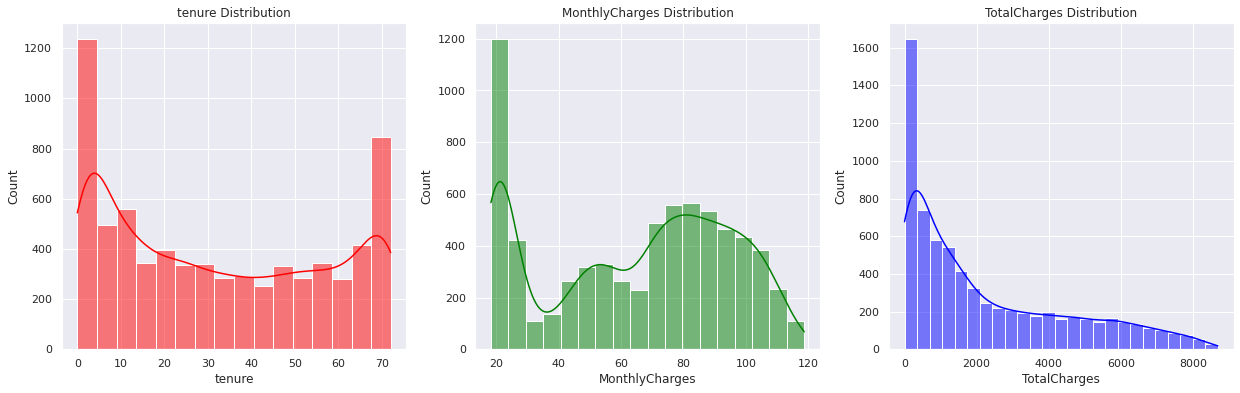

In [28]:
hist_group(df,['tenure','MonthlyCharges','TotalCharges'])

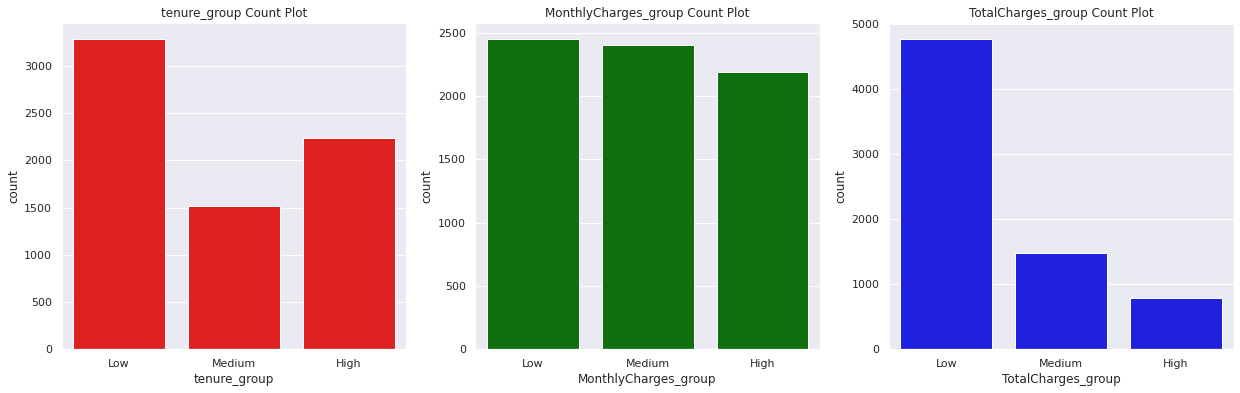

In [29]:
count_group(df,['tenure_group','MonthlyCharges_group','TotalCharges_group'])

In [30]:
#pie_group(df,['tenure_group','MonthlyCharges_group','TotalCharges_group'],'Account info')

**4. about 46.7% are recent customers.<br>
5. High, low, and medium monthly charges each represent about a third of the customer base.<br>
6. 67.8% of the customers pay low charges in total. Maybe there is a correlation between high monthly charges and churn.**

<a id='5.2.3'></a>
<h3>Services that each customer has signed up for

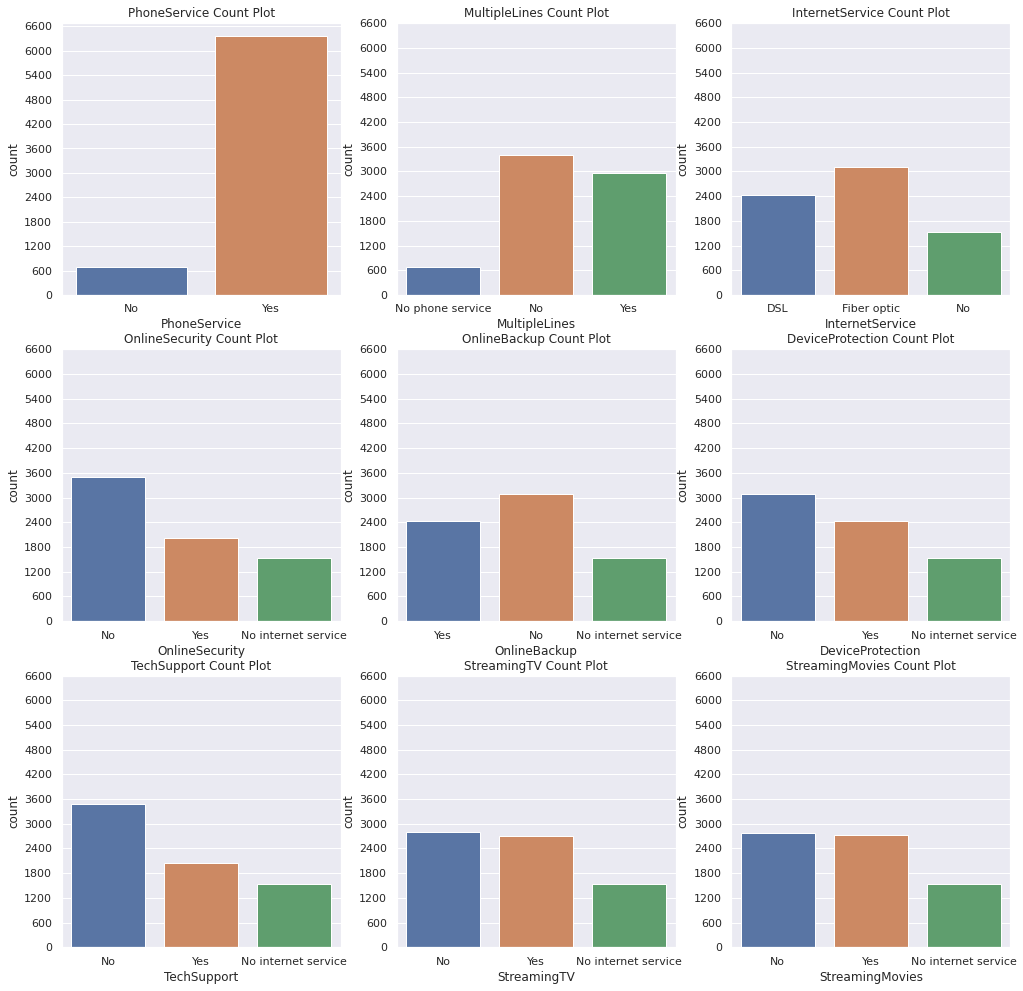

In [31]:
cols = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig , ax = plt.subplots(3,3,figsize=(17,17))
for i , col in enumerate(cols):
        sns.countplot(
                      data=df
                      ,x=col
                      ,ax=ax[i//3,i%3]
                      ,palette='deep'
                      )
        ax[i//3,i%3].set_title(f'{col} Count Plot')
        ax[i//3,i%3].set_yticks(range(0, df.shape[0], 600))

plt.show()

In [32]:
#pie_group(df,['PhoneService','MultipleLines','InternetService'])
#pie_group(df,['OnlineSecurity','OnlineBackup','DeviceProtection'])
#pie_group(df,['TechSupport','StreamingTV','StreamingMovies'])

**Percentages of Customers Using each Service**
1. Phone Service: **90.3%**
2. Multiple Lines: **42.2%**
3. Internet Service: 78.4% --> **Fiber optic 44% - DSL 34.4%**
4. Online Security: **28.7%**
5. Online Backup: **34.5%**
6. Device Protection: **34.4%**
7. Tech Support: **29%**
8. Streaming TV: **38.4%**
9. Streaming Movies: **38.8%**

<a id='5.2.4'></a>
<h3>Target Feature (Churn)

In [33]:
pie(df,'Churn')

**Roughly one quarter of customers churned, or 26.5%.**

<a id='5.3'></a>
<h2>Bivariate Analysis

In [34]:
#This function is to show churn rate as a bar plot
def churn_rate(df,col,hue=None):
    sns.barplot(data=df,x=col,y='Churn',hue=hue,ci=None)
    plt.title(f'{col} Churn Rate')
    plt.show()

In [35]:
# this function takes from 1 to 3 features and plot their churn rates
def churn_rates(df,cols,set_hue=None):
    fig , ax = plt.subplots(1,len(cols),figsize=(7*len(cols),6))
    for i , col in enumerate(cols):
        sns.barplot(
                      data=df
                      ,x=col , y='Churn'
                      ,ax=ax[i]
                      ,hue=set_hue
                        ,ci=None)
        ax[i].set_title(f'{col} Churn Rates')
    plt.show()

In [36]:
# Here we transform churn to numeric values
df['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
df['Churn'].replace(to_replace = 'No',  value = 0, inplace = True)
churn = df[df.Churn== 1]
no_churn = df[df.Churn==0]

<a id='5.3.1'></a>
<h3>Demographic info 

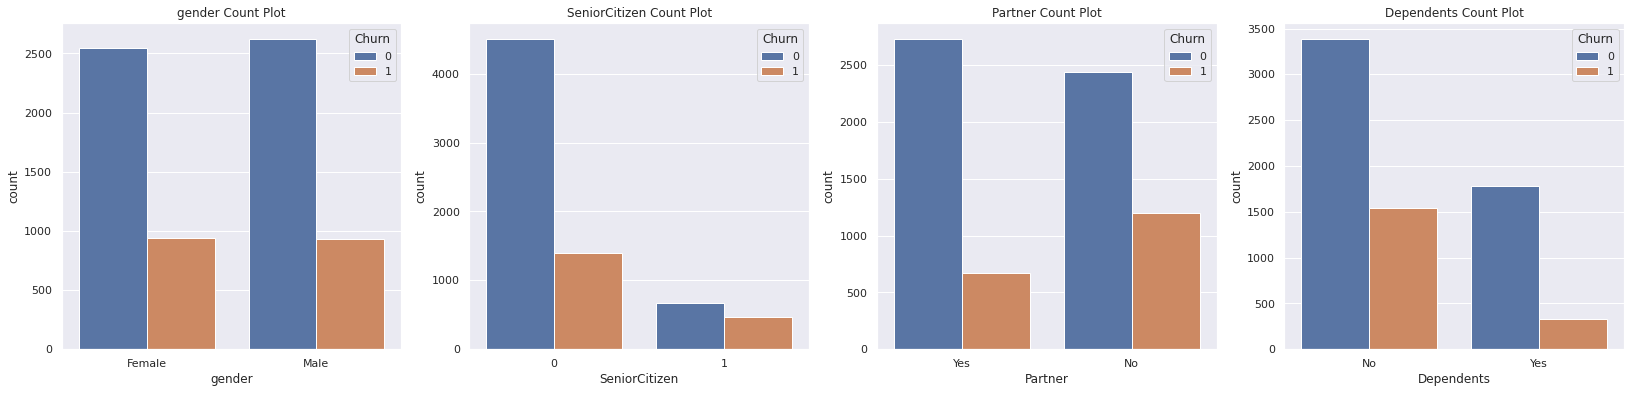

In [37]:
count_group(df,['gender','SeniorCitizen','Partner','Dependents'],set_hue='Churn',set_palette='deep')

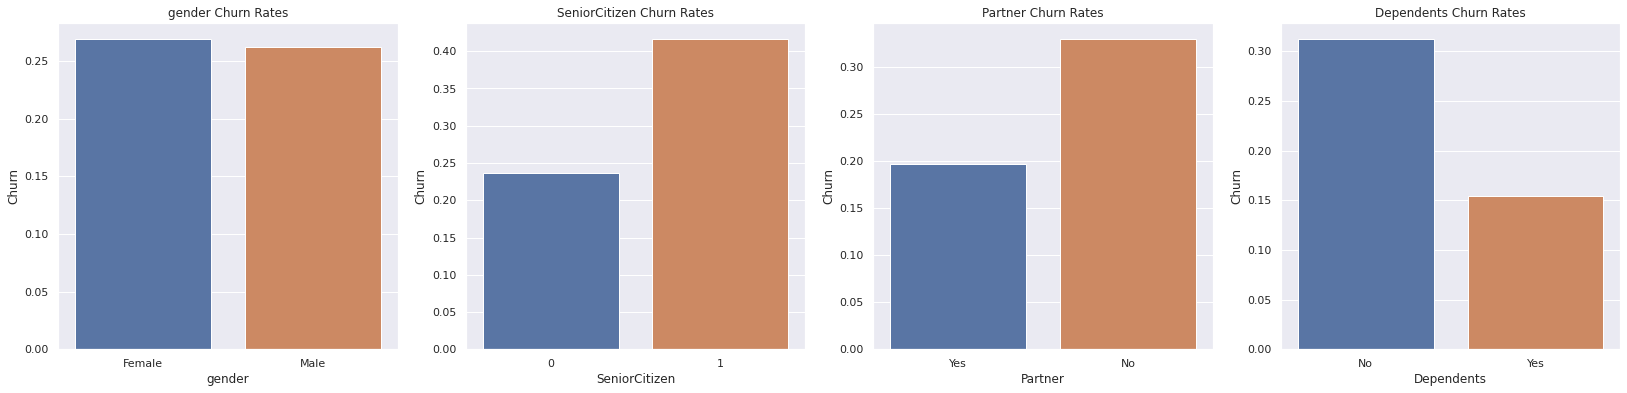

In [38]:
churn_rates(df,['gender','SeniorCitizen','Partner','Dependents'])

**1. Gender has no effect on Churn Rate.<br>
2. Seniors are more probable to churn with a churn rate of 0.42 while 0.23 for non seniors. <br>
3. Customers that don't have partners are more likely to churn with a rate of 0.33.<br>
4. Customers that don't have dependents are more likely to churn with a rate of 0.32.**

<a id='5.3.2'></a>
<h3>Customer account information

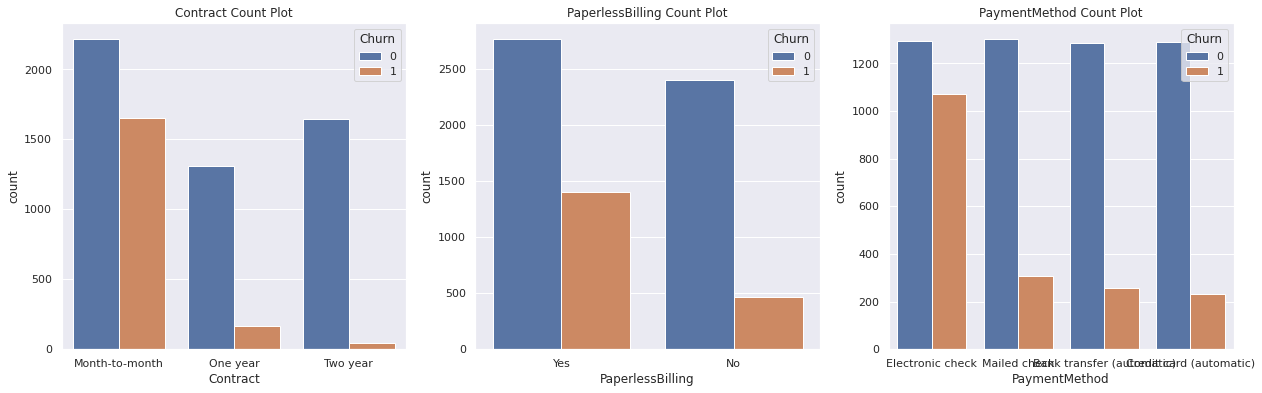

In [39]:
count_group(df,['Contract','PaperlessBilling','PaymentMethod'],set_hue='Churn',set_palette='deep')

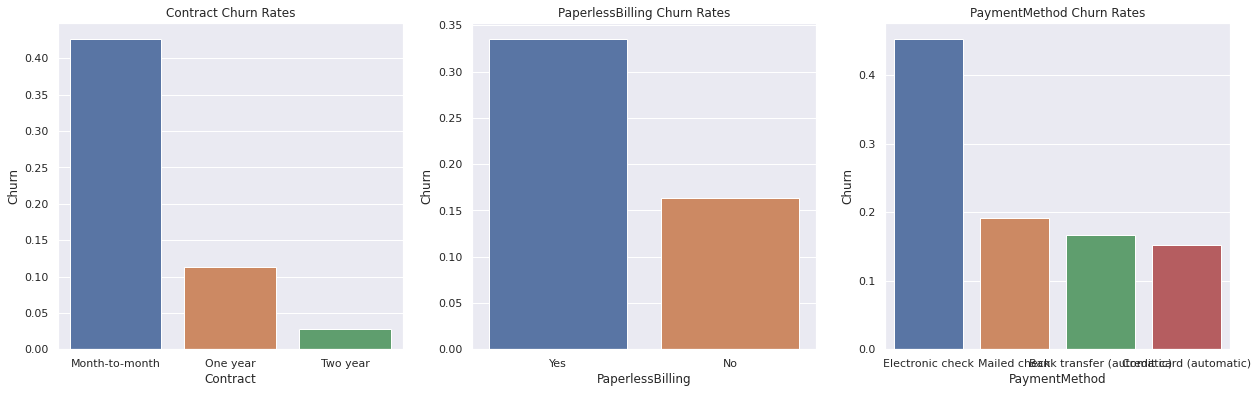

In [40]:
churn_rates(df,['Contract','PaperlessBilling','PaymentMethod'])

**1. Customers With Month to Month contract are more likely to churn with a churn rate of 0.42.<br>
2. Customers that prefer Paperless Billing are more likely to churn 0.33.<br>
3. Customers that pay with Electronic Check have a high churn rate 0.44**

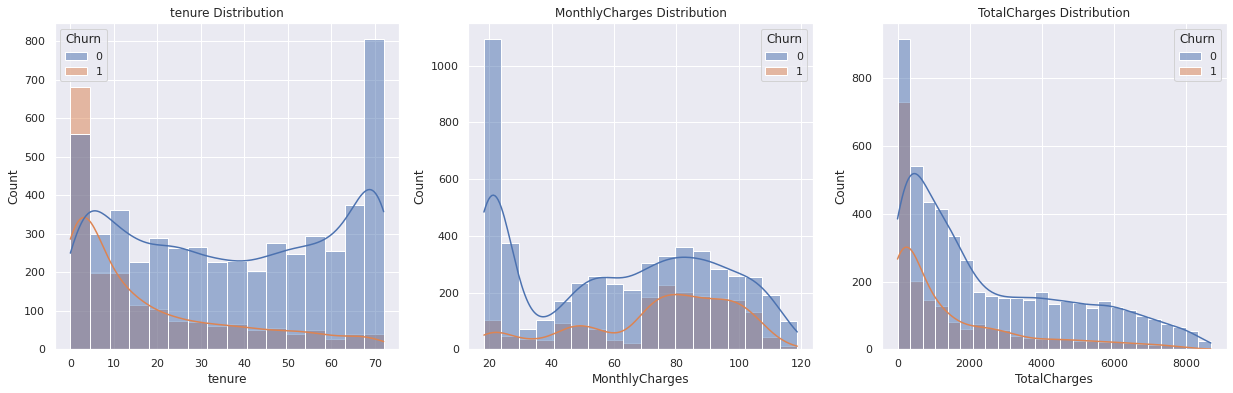

In [41]:
hist_group(df,['tenure','MonthlyCharges','TotalCharges'],set_hue='Churn')

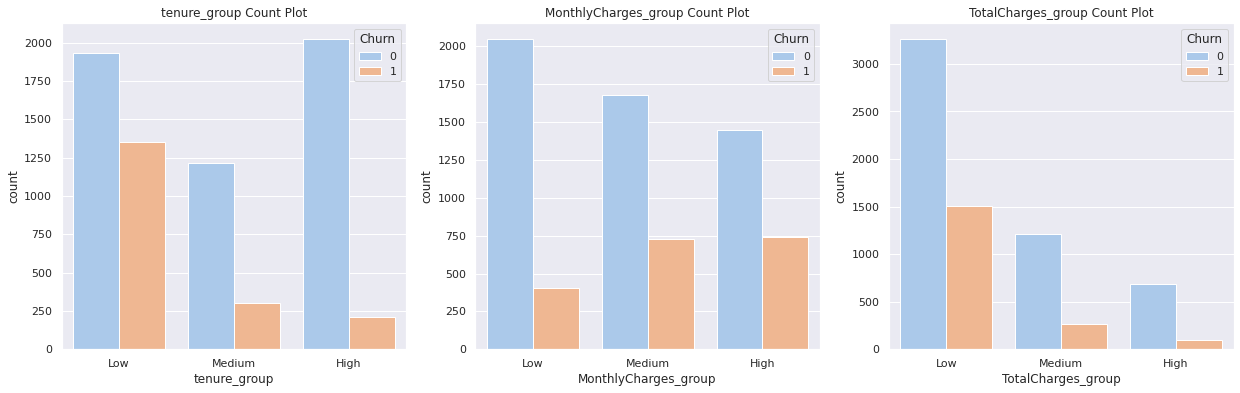

In [42]:
count_group(df,['tenure_group','MonthlyCharges_group','TotalCharges_group'],set_hue='Churn',set_palette='pastel')

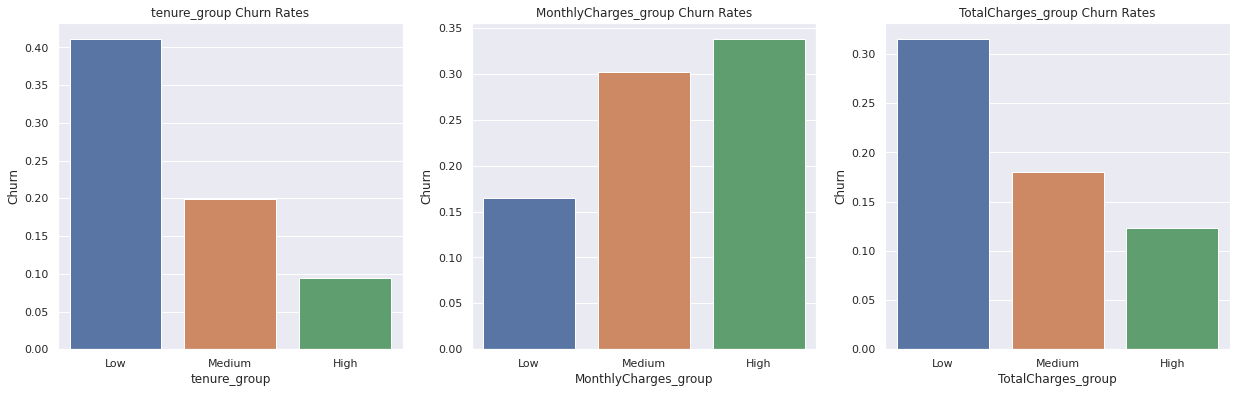

In [43]:
churn_rates(df,['tenure_group','MonthlyCharges_group','TotalCharges_group'])

**4. The longer the customer stay with the corporation the less the churn rate (low: 0.41).<br>
5. The higher the charges the higher the churn rate (high: 0.34).<br>**

<a id='5.3.3'></a>
<h3>Services that each customer has signed up for

<a id='5.3.3.1'></a>
<h4>Percentages of Customers using each Service

In [44]:
#pie_group(churn,['PhoneService','MultipleLines','InternetService'],'Services')
#pie_group(churn,['OnlineSecurity','OnlineBackup','DeviceProtection'])
#pie_group(churn,['TechSupport','StreamingTV','StreamingMovies'])

In [45]:
cols = ['PhoneService','MultipleLines','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
perc_churn = []
perc_no_churn=[]
for col in cols:
    x = churn[col].value_counts(normalize=True)['Yes'].round(3)*100
    perc_churn.append(x)
    x= no_churn[col].value_counts(normalize=True)['Yes'].round(3)*100
    perc_no_churn.append(x)


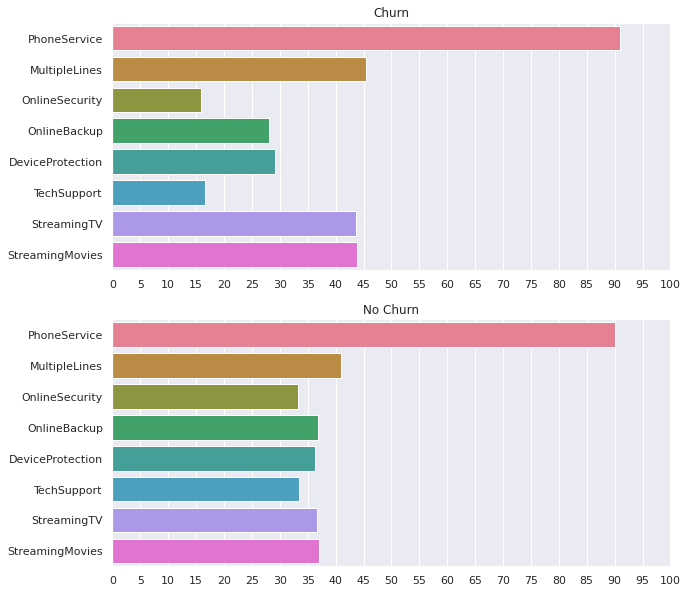

In [46]:
fig,ax=plt.subplots(2,1,figsize=(10,10))
sns.barplot(y=cols,x=perc_churn,orient='h',ax=ax[0],palette='husl');
sns.barplot(y=cols,x=perc_no_churn,orient='h',ax=ax[1],palette='husl');
ax[0].set_title('Churn')
ax[1].set_title('No Churn')
ax[0].set_xticks(range(0, 101, 5))
ax[1].set_xticks(range(0, 101, 5))
fig.show()

In [47]:
pie(no_churn,'InternetService')

In [48]:
pie(churn,'InternetService')

<a id='5.3.3.2'><a>
<h4>Services Churn Rates

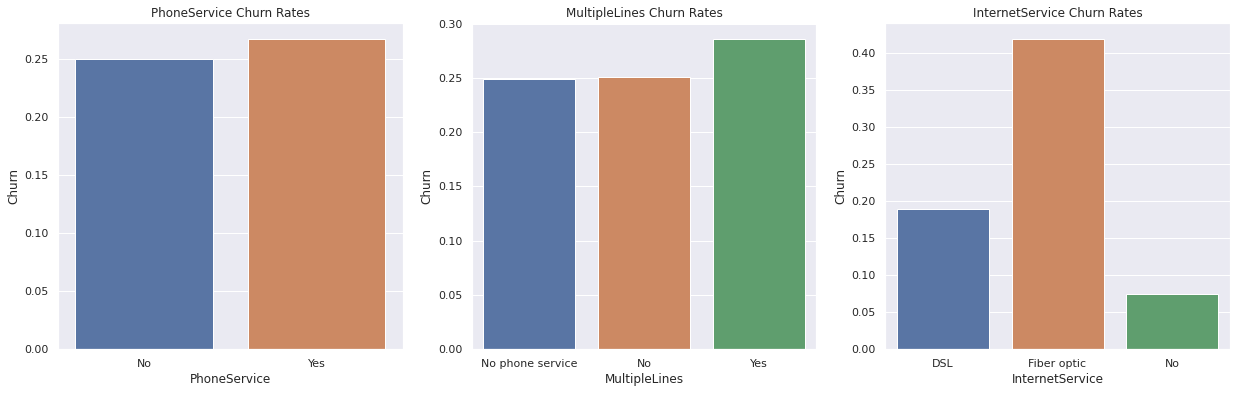

In [49]:
churn_rates(df,['PhoneService','MultipleLines','InternetService'])

**Customers using Fiber Optic Have a high churn rate (0.42).**

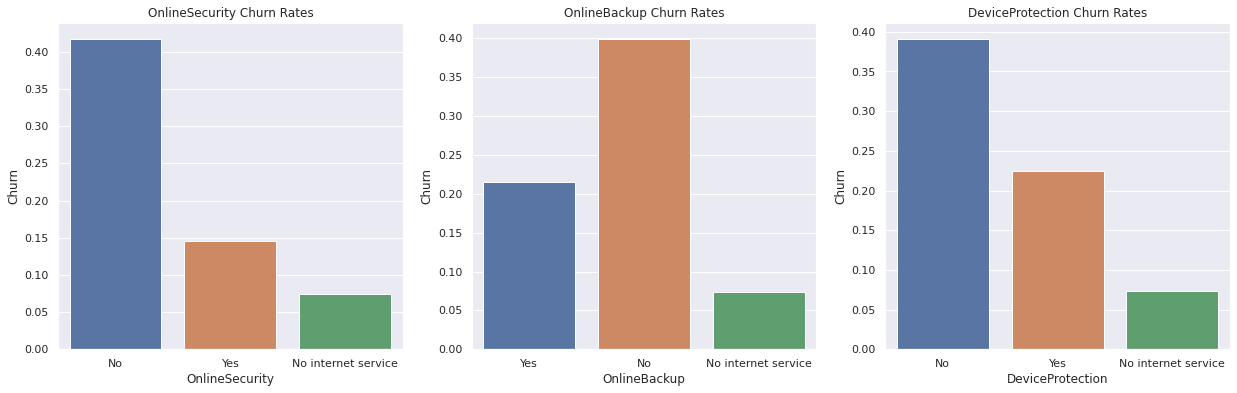

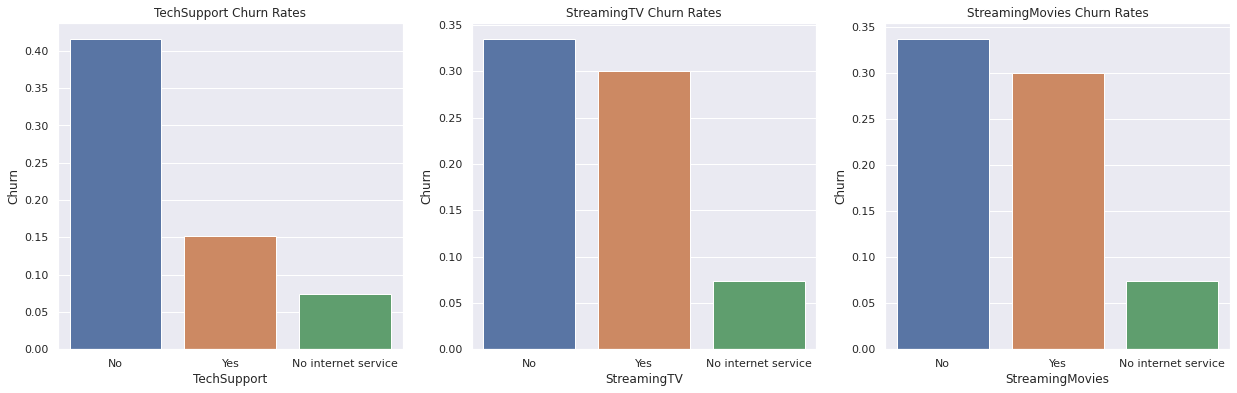

In [50]:
churn_rates(df,['OnlineSecurity','OnlineBackup','DeviceProtection'])
churn_rates(df,['TechSupport','StreamingTV','StreamingMovies'])

**Customers Using These services have low churn rates compared to customers who don't.**

<a id='5.4'></a>
<h2>MultiVariate Analysis (Target: Churn , InternetService)

<a id='5.4.1'></a>
<h3>Demographic info

In [51]:
print('        #######Churn Rates#######')
df.groupby(['InternetService','SeniorCitizen'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  SeniorCitizen
Fiber optic      1                0.472924
                 0                0.399117
DSL              1                0.301158
                 0                0.176226
No               1                0.096154
Name: Churn, dtype: float64

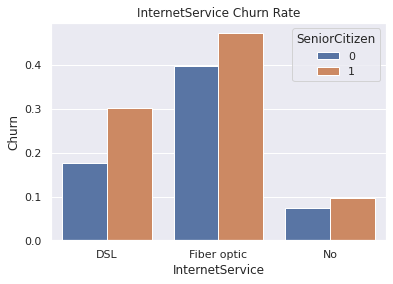

In [52]:
churn_rate(df,'InternetService','SeniorCitizen')

In [53]:
print('        #######Churn Rates#######')
df.groupby(['InternetService','Partner'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  Partner
Fiber optic      No         0.496875
                 Yes        0.335561
DSL              No         0.256185
                 Yes        0.118151
No               No         0.106599
Name: Churn, dtype: float64

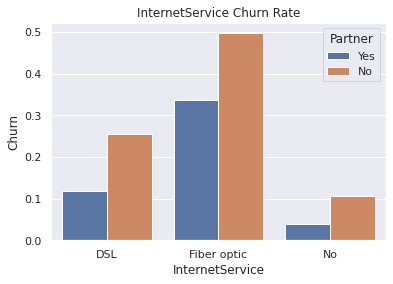

In [54]:
churn_rate(df,'InternetService','Partner')

In [55]:
print('        #######Churn Rates#######')
df.groupby(['InternetService','Dependents'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  Dependents
Fiber optic      No            0.449877
                 Yes           0.305136
DSL              No            0.224629
                 Yes           0.119255
No               No            0.096263
Name: Churn, dtype: float64

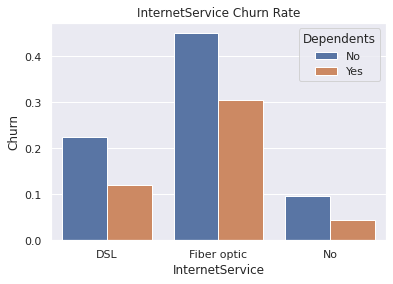

In [56]:
churn_rate(df,'InternetService','Dependents')

<a id='5.4.2'></a>
<h3>Customer Account info

In [57]:
print('        #######Churn Rates#######')
df.groupby(['InternetService','Contract'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  Contract      
Fiber optic      Month-to-month    0.546053
DSL              Month-to-month    0.322159
Fiber optic      One year          0.192950
No               Month-to-month    0.188931
DSL              One year          0.092982
Name: Churn, dtype: float64

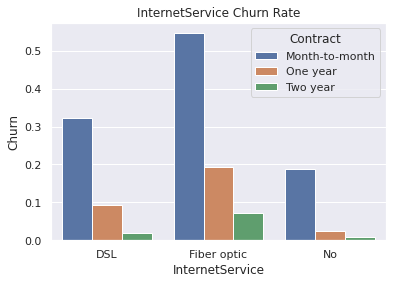

In [58]:
churn_rate(df,'InternetService','Contract')

In [59]:
print('        #######Churn Rates#######')
df.groupby(['InternetService','PaperlessBilling'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  PaperlessBilling
Fiber optic      Yes                 0.445929
                 No                  0.326676
DSL              Yes                 0.218045
                 No                  0.154904
No               Yes                 0.094170
Name: Churn, dtype: float64

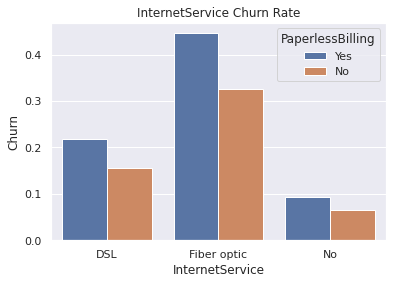

In [60]:
churn_rate(df,'InternetService','PaperlessBilling')

In [61]:
print('        #######Churn Rates#######')
df.groupby(['InternetService','PaymentMethod'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  PaymentMethod            
Fiber optic      Electronic check             0.532288
                 Mailed check                 0.426357
DSL              Electronic check             0.319444
Fiber optic      Bank transfer (automatic)    0.289474
                 Credit card (automatic)      0.252931
Name: Churn, dtype: float64

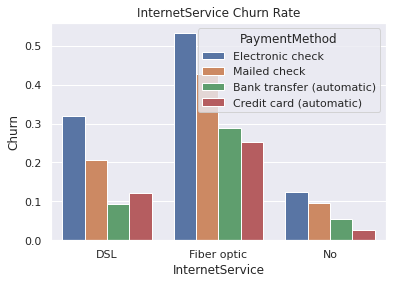

In [62]:
churn_rate(df,'InternetService','PaymentMethod')

In [63]:
print('        #######Churn Rates#######')
df.groupby(['InternetService','tenure_group'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  tenure_group
Fiber optic      Low             0.628653
                 Medium          0.356406
DSL              Low             0.332432
Fiber optic      High            0.170611
No               Low             0.132732
Name: Churn, dtype: float64

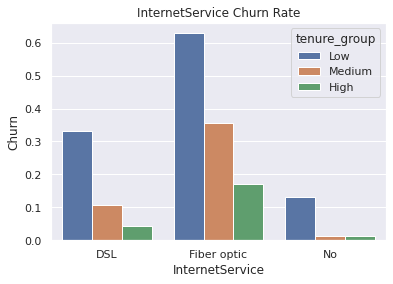

In [64]:
churn_rate(df,'InternetService','tenure_group')

In [65]:
print('        #######Churn Rates#######')
df.groupby(['InternetService','MonthlyCharges_group'])['Churn'].mean().nlargest()

        #######Churn Rates#######


InternetService  MonthlyCharges_group
Fiber optic      Medium                  0.535373
                 High                    0.359512
DSL              Low                     0.313578
                 Medium                  0.121771
No               Low                     0.074050
Name: Churn, dtype: float64

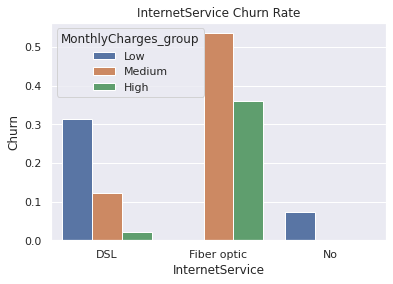

In [66]:
churn_rate(df,'InternetService','MonthlyCharges_group')

<a id='6'></a>
<h1>Conclusion

1. Based on Demographic info:
    1. Gender has no effect on Churn Rate .
    2. Seniors are more probable to churn with a churn rate of 0.42 while 0.23 for non seniors.
    3. Customers that don't have partners are more likely to churn with a rate of 0.33.
    4. Customers that don't have dependents are more likely to churn with a rate of 0.32.
2. Based on Customr Account info:
    1. Customers With Month to Month contract are more likely to churn with a churn rate of 0.42.
    2. Customers that prefer Paperless Billing are more likely to churn 0.33.
    3. Customers that pay with Electronic Check have a high churn rate 0.44
    4. The longer the customer stay with the corporation the less the churn rate (low: 0.41).
    5. The higher the charges the higher the churn rate (high: 0.34).
3. In term of Services
    1. Customers using Fiber Optic Have a high churn rate (0.42).
    2. Customers Using the rest of the services have low churn rates compared to customers who don't.

<h2> Please Upvote if you liked my work.

You can also : 
* Check the **GitHub Project Repository**

[![](https://img.shields.io/badge/Customer%20Churn%20EDA-GitHub-100000?logo=github&logoColor=white)](https://github.com/omar-mostafa-taha/Customer_Churn)

* View the **Streamlit App** of this Project **Live** 

[![Live in Streamlit](https://static.streamlit.io/badges/streamlit_badge_black_white.svg)](https://customer-churn-eda.streamlit.app/)